In [2]:
!pip uninstall tensorflow
!pip install tensorflow==2.8.3

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.9/dist-packages/tensorflow-2.11.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.5/498.5 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
# !wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
# !wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2023-03-22 05:30:43--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.198.41, 52.217.194.209, 52.216.250.220, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.198.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco_ann2017.zip’

coco_ann2017.zip    100%[===================>] 241.19M  13.0MB/s    in 21s     

2023-03-22 05:31:04 (11.4 MB/s) - ‘coco_ann2017.zip’ saved [252907541/252907541]



In [5]:
import tensorflow

tensorflow.__version__

'2.8.3'

In [6]:
from zipfile import ZipFile, BadZipFile
import os
def extract_zip_file(extract_path,content_folder=True, remove=True):
    try:
        with ZipFile(extract_path+".zip") as zfile:
          if content_folder ==False:
            zfile.extractall(extract_path)
          else:
            zfile.extractall("./coco_train2017")

        # remove zipfile
        if remove ==True:
          zfileTOremove=f"{extract_path}"+".zip"
          if os.path.isfile(zfileTOremove):
              os.remove(zfileTOremove)
          else:
              print("Error: %s file not found" % zfileTOremove)    
    except BadZipFile as e:
        print("Error:", e)
# extract_train_path = "./coco_train2017"
# extract_val_path = "./coco_val2017"
extract_ann_path="./coco_ann2017"
# extract_zip_file(extract_train_path)
# extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

In [7]:
SAMPLE_TRAIN_PATH = "/content/gdrive/MyDrive/3조/sample_train_coco (1)"
extract_zip_file(SAMPLE_TRAIN_PATH, remove=False)
extract_zip_file(SAMPLE_TRAIN_PATH, content_folder =True,remove=False)


In [8]:
# from collections import defaultdict
# import json
# import numpy as np

# class COCOParser:
#     def __init__(self, anns_file, imgs_dir):
#         with open(anns_file, 'r') as f:
#             coco = json.load(f)
            
#         self.annIm_dict = defaultdict(list)        
#         self.cat_dict = {} 
#         self.annId_dict = {}
#         self.im_dict = {}
#         self.licenses_dict = {}

#         for ann in coco['annotations']:           
#             self.annIm_dict[ann['image_id']].append(ann) 
#             self.annId_dict[ann['id']]=ann
#         for img in coco['images']:
#             self.im_dict[img['id']] = img
#         for cat in coco['categories']:
#             self.cat_dict[cat['id']] = cat
#         for license in coco['licenses']:
#             self.licenses_dict[license['id']] = license

#     def get_imgIds(self):
#         return list(self.im_dict.keys())

#     def get_annIds(self, im_ids):
#         im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
#         return [ann['id'] for im_id in im_ids for ann in self.annIm_dict[im_id]]

#     def load_anns(self, ann_ids):
#         im_ids=ann_ids if isinstance(ann_ids, list) else [ann_ids]
#         return [self.annId_dict[ann_id] for ann_id in ann_ids]        

#     def load_cats(self, class_ids):
#         class_ids=class_ids if isinstance(class_ids, list) else [class_ids]
#         return [self.cat_dict[class_id] for class_id in class_ids]

#     def get_imgLicenses(self,im_ids):
#         im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
#         lic_ids = [self.im_dict[im_id]["license"] for im_id in im_ids]
#         return [self.licenses_dict[lic_id] for lic_id in lic_ids]

In [9]:
# coco_annotations_file="/content/coco_ann2017/annotations/instances_val2017.json"
# coco_images_dir="/content/coco_val2017/val2017"
# coco= COCOParser(coco_annotations_file, coco_images_dir)


In [10]:
import tensorflow as tf
import os
import json
import pandas as pd
import re
import numpy as np
import time
import matplotlib.pyplot as plt
import collections
import random
import requests
import json
from math import sqrt
from PIL import Image
from tqdm.auto import tqdm

BASE_PATH = "/content/coco_ann2017"
BASE_PATH2 = "/content/coco_train2017"
BASE_PATH_SAMPLE = "/content/coco_train2017/sample_train_coco"


# annotation json 읽기
with open(f'{BASE_PATH2}/annotations/captions_train2017.json', 'r') as f:
    data = json.load(f)
    # print(data.keys())
    # print("이미지", data['images'][0])
    data = data['annotations']




In [12]:
# /content/coco_train2017/annotations/captions_train2017.json
# /content/coco_ann2017/annotations/captions_train2017.json

In [13]:
#custom data

data_size = 200


data_test = data[:data_size]

data_test

img_cap_pairs2 = []

def create_sample_dataset():

  for sample in data_test:
      img_name = '%012d.jpg' % sample['image_id']
      img_cap_pairs2.append([img_name, sample['caption']])
  print(img_name)
  print(sample['image_id'])
  captions2 = pd.DataFrame(img_cap_pairs2, columns=['image', 'caption'])
  captions2['image'] = captions2['image'].apply(
      lambda x: f'{BASE_PATH2}/train2017/{x}')

  images=[]
  for img_direction in captions2['image']:
    print(img_direction)

    im = Image.open(img_direction)# PIL 사용해서 
    images.append(im)
    string= img_direction.replace("/","_")
    im.save(f"sample_train_coco/{string}")
    # print(img_direction.replace("/","_"))

  # images[0]



# sample 만들때 사용할것 coco_train_2017 wget으로 받았다면 주석 실행
"""
create_sample_dataset()

!mkdir sample_train_coco

!zip -r sample_train_coco.zip sample_train_coco

"""

'\ncreate_sample_dataset()\n\n!mkdir sample_train_coco\n\n!zip -r sample_train_coco.zip sample_train_coco\n\n'

In [14]:
# caption 파일 읽기 BASE_PATH_Sample
img_cap_pairs = []
number_of_captions = 200

# data_size =200
def create_dataframe (sample_number= 70000,path = BASE_PATH_SAMPLE, shuffle_data =True ):
  global captions

  for sample in data:
      img_name = '%012d.jpg' % sample['image_id']
      img_cap_pairs.append([img_name, sample['caption']])
  # print(img_name)
  # print(sample['image_id'])
  
  captions = pd.DataFrame(img_cap_pairs, columns=['image', 'caption'])
  # print(captions)
  captions['image'] = captions['image'].apply(
      lambda x: f'{path}/train2017/{x}' # path to image dataset
  )
  print(len(captions))

  if shuffle_data ==True:

    captions = captions.sample(sample_number)
    captions = captions.reset_index(drop=True)

  else:
    captions =captions[:number_of_captions]



# create_dataframe()

create_dataframe(shuffle_data=False)

captions.head()
print(len(captions))


591753
200


In [15]:
# caption text 전처리

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    text = '[start] ' + text + ' [end]'
    return text

In [16]:
captions['caption'] = captions['caption'].apply(preprocess)

#  b-> a 로 바꾸기?

chunk = "_content_coco_train2017_train2017_"

# print(len("/content/coco_train2017/sample_train_coco/train2017"))
# print(len("/content/coco_train2017/sample_train_coco/"))
# a ="content/coco_train2017/sample_train_coco/_content_coco_train2017_train2017_000000005247.jpg"
# b = "content/coco_train2017/sample_train_coco/train2017/000000078407.jpg"
# print(len(a))
# print(len(b))

#c = "/content/coco_train2017/sample_train_coco_content_coco_train2017_train2017_000000279677.jpg"


# print(b[:41]+chunk +a[-16:])
# c= b[:41]+chunk +b[-16:]
# if c == a:
#   print("true")
captions['image']=captions.image.apply(lambda  x: x[:42]+chunk+ x[-16:])

display(
captions.head(),
captions.image[0])

# 왜 안바꿔었지?

<ipython-input-16-25cd74312a1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captions['caption'] = captions['caption'].apply(preprocess)
<ipython-input-16-25cd74312a1f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  captions['image']=captions.image.apply(lambda  x: x[:42]+chunk+ x[-16:])


,image,caption
0,/content/coco_train2017/sample_train_coco/_con...,[start] a bicycle replica with a clock as the ...
1,/content/coco_train2017/sample_train_coco/_con...,[start] a room with blue walls and a white sin...
2,/content/coco_train2017/sample_train_coco/_con...,[start] a car that seems to be parked illegall...
3,/content/coco_train2017/sample_train_coco/_con...,[start] a large passenger airplane flying thro...
4,/content/coco_train2017/sample_train_coco/_con...,[start] there is a gol plane taking off in a p...


'/content/coco_train2017/sample_train_coco/_content_coco_train2017_train2017_000000203564.jpg'

In [17]:
sample_captions =captions[:75]

image      /content/coco_train2017/sample_train_coco/_con...
caption    [start] a man getting a drink from a water fou...
Name: 28, dtype: object
---------------------------------------
[start] a man getting a drink from a water fountain that is a toilet [end]

/content/coco_train2017/sample_train_coco/_content_coco_train2017_train2017_000000052087.jpg



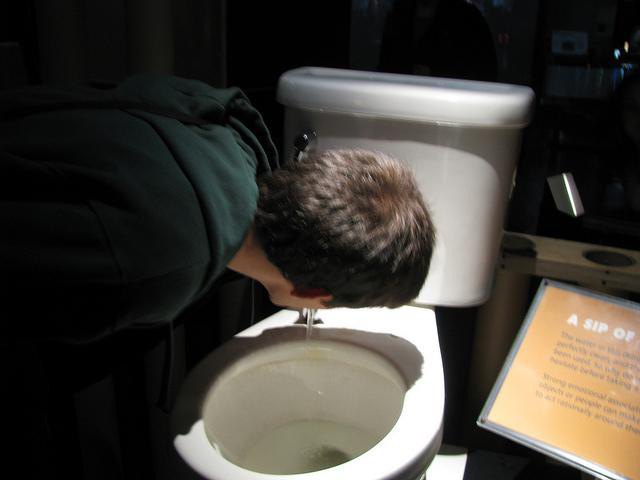

In [18]:



def display_sample_image(captions = sample_captions):
  random_row = captions.sample(1).iloc[0] 
  print(random_row)
  print("---------------------------------------")
  print(random_row.caption)
  print()
  print(random_row.image)
  print()
  im = Image.open(random_row.image)# PIL 사용해서 
  im.show()

display_sample_image()

In [19]:
MAX_LENGTH = 40
VOCABULARY_SIZE = 15000
BATCH_SIZE = 64
BUFFER_SIZE = 1000
EMBEDDING_DIM = 512
UNITS = 512
EPOCHS = 5

In [20]:
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=VOCABULARY_SIZE,
    standardize=None,
    output_sequence_length=MAX_LENGTH)

tokenizer.adapt(captions['caption'])


# Doc 참조하길!

In [21]:
tokenizer.vocabulary_size()


504

In [22]:
import pickle

pickle.dump(tokenizer.get_vocabulary(), open('vocab_coco.file', 'wb'))

In [23]:
word2idx = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())

idx2word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

# Doc 참조

In [24]:
img_to_cap_vector = collections.defaultdict(list)
print(img_to_cap_vector)
# collection 에서 "키같은 값을 키로 만들고, 키의 값을 그룹화해서 리스트"
for img, cap in zip(captions['image'], captions['caption']):
    img_to_cap_vector[img].append(cap)
print(img, cap, "\n")
print(img_to_cap_vector[img])

img_keys = list(img_to_cap_vector.keys())
print(img_keys[0])
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = (img_keys[:slice_index], 
                                          img_keys[slice_index:])

## train_test_split 인데, coco_val2017 을쓰도록 수정해야함
print(img_name_train_keys[0])
train_imgs = []
train_captions = []


defaultdict(<class 'list'>, {})
/content/coco_train2017/sample_train_coco/_content_coco_train2017_train2017_000000027842.jpg [start] a long marble like bath room vanity with a stool two sink basins with mirrors and lights over them [end] 

['[start] a dual sink vanity with mirrors above the sinks [end]', '[start] a long marble like bath room vanity with a stool two sink basins with mirrors and lights over them [end]']
/content/coco_train2017/sample_train_coco/_content_coco_train2017_train2017_000000203564.jpg
/content/coco_train2017/sample_train_coco/_content_coco_train2017_train2017_000000581177.jpg


In [80]:
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    train_imgs.extend([imgt] * capt_len)
    train_captions.extend(img_to_cap_vector[imgt])
print( img_name_train_keys[-7])
print(img_to_cap_vector[img_name_train_keys[-7]])
print(capt_len)

val_imgs = []
val_captions = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    val_imgs.extend([imgv] * capv_len)
    val_captions.extend(img_to_cap_vector[imgv])

/content/coco_train2017/sample_train_coco/_content_coco_train2017_train2017_000000560591.jpg
['[start] a modern flush toilet in a bathroom with tile [end]', '[start] a toilet and trashcan in a white bathroom [end]', '[start] a white toilet sits on a tile floor [end]']
3


In [26]:
len(train_imgs), len(train_captions), len(val_imgs), len(val_captions)


(165, 165, 35, 35)

In [27]:
def load_data(img_path, caption):
    img = tf.io.read_file(img_path)
# 경로에 이미지파일 읽음

    img = tf.io.decode_jpeg(img, channels=3)

# jpeg 파일이 input 가정!, jpeg 를 읽음 채널3 , 즉 RGB 형태로 읽음

    img = tf.keras.layers.Resizing(299, 299)(img)

# Resizing을 통해 299,299 으로 맞춤 근거는??? Incepvtion_v3 preprocess 는 75 이상이여야함


    img = tf.keras.applications.inception_v3.preprocess_input(img)
    caption = tokenizer(caption)
    return img, caption

In [81]:

# from tensorflow.keras.applications import InceptionV3

# inceptionv3_model = InceptionV3()
# inceptionv3_model.summary()


In [28]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_imgs, train_captions))



train_dataset = train_dataset.map(
    load_data, num_parallel_calls=tf.data.AUTOTUNE
    ).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    

val_dataset = tf.data.Dataset.from_tensor_slices(
    (val_imgs, val_captions))

val_dataset = val_dataset.map(
    load_data, num_parallel_calls=tf.data.AUTOTUNE
    ).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [84]:
image_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomContrast(0.3),
    ]
)

# 무엇의 역할?? CNN 인풋데이터를 더 다양하게?

#RandomFlip : 과적합줄여줌 "horizontal flip 을 시킴", 

#RandomRotation

#RandomContrast


In [83]:
def CNN_Encoder(): # Inception
    inception_v3 = tf.keras.applications.InceptionV3(
        include_top=False,
        weights='imagenet'
    )

    output = inception_v3.output
    print("output1\n", output,"\n------------------------------------------------------------")
    # inception_v3.output , 즉    (None, 2048) 

    output = tf.keras.layers.Reshape(
        (-1, output.shape[-1]))(output)
    # output after reshape

    print("output2\n", output,"\n------------------------------------------------------------")

    cnn_model = tf.keras.models.Model(inception_v3.input, output)
    return cnn_model


# cnn model inception 그대로 가져오는거랑 동일. output은 
# 
# CNN_Encoder().summary()
CNN_Encoder()

output1
 KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'") 
------------------------------------------------------------
output2
 KerasTensor(type_spec=TensorSpec(shape=(None, None, 2048), dtype=tf.float32, name=None), name='reshape_7/Reshape:0', description="created by layer 'reshape_7'") 
------------------------------------------------------------


In [71]:
#(None, None, None, 2048)

# batchsize , width, height , output 
# (batch_size, output_size, output_size, 2048)

# change to

# batch size, width+height(some kind of operation), output)
# (batch_size * output_size * output_size, 2048)

print(EMBEDDING_DIM)


512


In [31]:
class TransformerEncoderLayer(tf.keras.layers.Layer):

    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()
        self.attention = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense = tf.keras.layers.Dense(embed_dim, activation="relu")
    

    def call(self, x, training):
        x = self.layer_norm_1(x)
        x = self.dense(x)

        attn_output = self.attention(
            query=x,
            value=x,
            key=x,
            attention_mask=None,
            training=training
        )

        x = self.layer_norm_2(x + attn_output)
        return x


In [75]:
tel = TransformerEncoderLayer(EMBEDDING_DIM, 1)

print(tel)


In [32]:
class Embeddings(tf.keras.layers.Layer):

    def __init__(self, vocab_size, embed_dim, max_len):
        super().__init__()
        self.token_embeddings = tf.keras.layers.Embedding(
            vocab_size, embed_dim)
        self.position_embeddings = tf.keras.layers.Embedding(
            max_len, embed_dim, input_shape=(None, max_len))
    

    def call(self, input_ids):
        length = tf.shape(input_ids)[-1]
        position_ids = tf.range(start=0, limit=length, delta=1)
        position_ids = tf.expand_dims(position_ids, axis=0)

        token_embeddings = self.token_embeddings(input_ids)
        position_embeddings = self.position_embeddings(position_ids)

        return token_embeddings + position_embeddings

In [33]:
class TransformerDecoderLayer(tf.keras.layers.Layer):

    def __init__(self, embed_dim, units, num_heads):
        super().__init__()
        self.embedding = Embeddings(
            tokenizer.vocabulary_size(), embed_dim, MAX_LENGTH)

        self.attention_1 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )
        self.attention_2 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )

        self.layernorm_1 = tf.keras.layers.LayerNormalization()
        self.layernorm_2 = tf.keras.layers.LayerNormalization()
        self.layernorm_3 = tf.keras.layers.LayerNormalization()

        self.ffn_layer_1 = tf.keras.layers.Dense(units, activation="relu")
        self.ffn_layer_2 = tf.keras.layers.Dense(embed_dim)

        self.out = tf.keras.layers.Dense(tokenizer.vocabulary_size(), activation="softmax")

        self.dropout_1 = tf.keras.layers.Dropout(0.3)
        self.dropout_2 = tf.keras.layers.Dropout(0.5)
    

    def call(self, input_ids, encoder_output, training, mask=None):
        embeddings = self.embedding(input_ids)

        combined_mask = None
        padding_mask = None
        
        if mask is not None:
            causal_mask = self.get_causal_attention_mask(embeddings)
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)
            combined_mask = tf.minimum(combined_mask, causal_mask)

        attn_output_1 = self.attention_1(
            query=embeddings,
            value=embeddings,
            key=embeddings,
            attention_mask=combined_mask,
            training=training
        )

        out_1 = self.layernorm_1(embeddings + attn_output_1)

        attn_output_2 = self.attention_2(
            query=out_1,
            value=encoder_output,
            key=encoder_output,
            attention_mask=padding_mask,
            training=training
        )

        out_2 = self.layernorm_2(out_1 + attn_output_2)

        ffn_out = self.ffn_layer_1(out_2)
        ffn_out = self.dropout_1(ffn_out, training=training)
        ffn_out = self.ffn_layer_2(ffn_out)

        ffn_out = self.layernorm_3(ffn_out + out_2)
        ffn_out = self.dropout_2(ffn_out, training=training)
        preds = self.out(ffn_out)
        return preds


    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0
        )
        return tf.tile(mask, mult)

In [34]:
class ImageCaptioningModel(tf.keras.Model):

    def __init__(self, cnn_model, encoder, decoder, image_aug=None):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.image_aug = image_aug
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.acc_tracker = tf.keras.metrics.Mean(name="accuracy")


    def calculate_loss(self, y_true, y_pred, mask):
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)


    def calculate_accuracy(self, y_true, y_pred, mask):
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)
    

    def compute_loss_and_acc(self, img_embed, captions, training=True):
        encoder_output = self.encoder(img_embed, training=True)
        y_input = captions[:, :-1]
        y_true = captions[:, 1:]
        mask = (y_true != 0)
        y_pred = self.decoder(
            y_input, encoder_output, training=True, mask=mask
        )
        loss = self.calculate_loss(y_true, y_pred, mask)
        acc = self.calculate_accuracy(y_true, y_pred, mask)
        return loss, acc

    
    def train_step(self, batch):
        imgs, captions = batch

        if self.image_aug:
            imgs = self.image_aug(imgs)
        
        img_embed = self.cnn_model(imgs)

        with tf.GradientTape() as tape:
            loss, acc = self.compute_loss_and_acc(
                img_embed, captions
            )
    
        train_vars = (
            self.encoder.trainable_variables + self.decoder.trainable_variables
        )
        grads = tape.gradient(loss, train_vars)
        self.optimizer.apply_gradients(zip(grads, train_vars))
        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state(acc)

        return {"loss": self.loss_tracker.result(), "acc": self.acc_tracker.result()}
    

    def test_step(self, batch):
        imgs, captions = batch

        img_embed = self.cnn_model(imgs)

        loss, acc = self.compute_loss_and_acc(
            img_embed, captions, training=False
        )

        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state(acc)

        return {"loss": self.loss_tracker.result(), "acc": self.acc_tracker.result()}

    @property
    def metrics(self):
        return [self.loss_tracker, self.acc_tracker]

In [35]:
encoder = TransformerEncoderLayer(EMBEDDING_DIM, 1)
decoder = TransformerDecoderLayer(EMBEDDING_DIM, UNITS, 8)

cnn_model = CNN_Encoder()
caption_model = ImageCaptioningModel(
    cnn_model=cnn_model, encoder=encoder, decoder=decoder, image_aug=image_augmentation,
)



87924736/87910968 [==============================] - 5s 0us/step


In [61]:
# cnn_model.summary()
encoder.summary()

AttributeError: ignored

In [36]:
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="none"
)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

caption_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=cross_entropy
)

In [37]:
# history = caption_model.fit(
#     train_dataset,
#     epochs=EPOCHS,
#     validation_data=val_dataset,
#     callbacks=[early_stopping]
# )

# WARNING:tensorflow:Using a while_loop for converting RngReadAndSkip cause there is no registered converter for this op.
# 같은 경고문 뜬다면 tf 2.8.3으로 downgrade 할것



In [38]:
history = caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)


Epoch 1/5
3/3 [==============================] - 26s 4s/step - loss: 6.9775 - acc: 0.0564 - val_loss: 6.3658 - val_acc: 0.0982
Epoch 2/5
3/3 [==============================] - 2s 554ms/step - loss: 6.1764 - acc: 0.1153 - val_loss: 6.6591 - val_acc: 0.0439
Epoch 3/5
3/3 [==============================] - 3s 698ms/step - loss: 5.6564 - acc: 0.0888 - val_loss: 5.7600 - val_acc: 0.0724
Epoch 4/5
3/3 [==============================] - 2s 552ms/step - loss: 4.7478 - acc: 0.1207 - val_loss: 5.3838 - val_acc: 0.1705
Epoch 5/5
3/3 [==============================] - 2s 558ms/step - loss: 4.0956 - acc: 0.2323 - val_loss: 5.3727 - val_acc: 0.2145


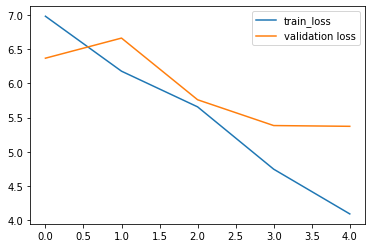

In [39]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [40]:
def load_image_from_path(img_path):
    img = tf.io.read_file(img_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.keras.layers.Resizing(299, 299)(img)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img


def generate_caption(img_path, add_noise=False):
    img = load_image_from_path(img_path)
    
    if add_noise:
        noise = tf.random.normal(img.shape)*0.1
        img = img + noise
        img = (img - tf.reduce_min(img))/(tf.reduce_max(img) - tf.reduce_min(img))
    
    img = tf.expand_dims(img, axis=0)
    img_embed = caption_model.cnn_model(img)
    img_encoded = caption_model.encoder(img_embed, training=False)

    y_inp = '[start]'
    for i in range(MAX_LENGTH-1):
        tokenized = tokenizer([y_inp])[:, :-1]
        mask = tf.cast(tokenized != 0, tf.int32)
        pred = caption_model.decoder(
            tokenized, img_encoded, training=False, mask=mask)
        
        pred_idx = np.argmax(pred[0, i, :])
        pred_idx = tf.convert_to_tensor(pred_idx)
        pred_word = idx2word(pred_idx).numpy().decode('utf-8')
        if pred_word == '[end]':
            break
        
        y_inp += ' ' + pred_word
    
    y_inp = y_inp.replace('[start] ', '')
    return y_inp

Predicted Caption: a a a a



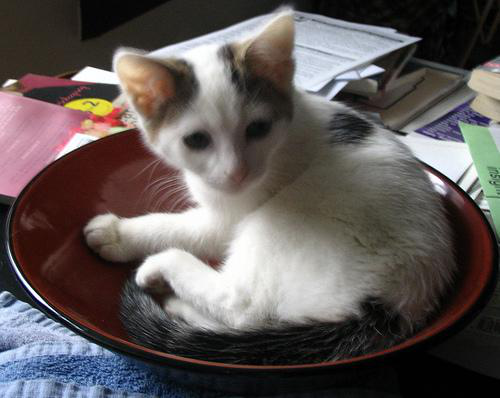

In [41]:
idx = random.randrange(0, len(captions))
img_path = captions.iloc[idx].image

pred_caption = generate_caption(img_path)
print('Predicted Caption:', pred_caption)
print()
Image.open(img_path)

In [42]:
# caption_model.summary()

In [43]:
!ls

coco_train2017	gdrive	sample_data  vocab_coco.file


In [45]:
import os 
print(os.getcwd())

caption_model.save_weights('caption_model_0321v1.h5')



/content


In [46]:
# caption_model2 = ImageCaptioningModel(
#     cnn_model=cnn_model, encoder=encoder, decoder=decoder, image_aug=image_augmentation,
# )


# caption_model2.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss=cross_entropy
# )
# caption_model2.built = True
# caption_model2.load_weights('./drive/MyDrive/caption_model_weight.h5')
# # caption_model2.load_weights('caption_model_0321v1.h5')


FileNotFoundError: ignored

In [ ]:
# # caption_model.shape

# caption_model_original = caption_model

Predicted Caption: a a parked a parked



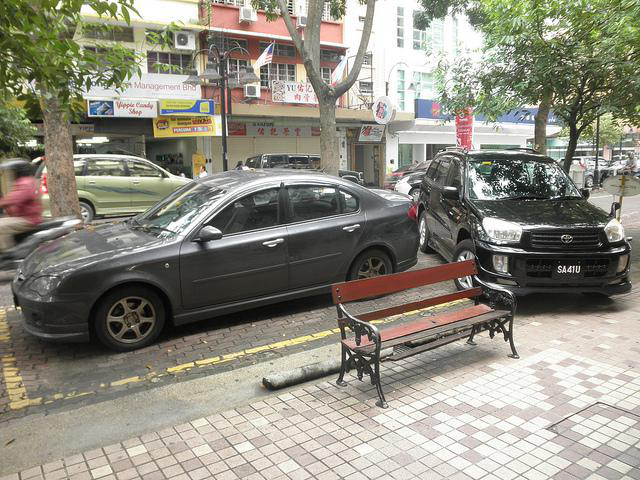

In [49]:
caption_model = caption_model2
img_path = captions.iloc[2].image

pred_caption = generate_caption(img_path)
print('Predicted Caption:', pred_caption)
print()
Image.open(img_path)

In [48]:
# caption_model = caption_model_original
# img_path = "/content/drive/MyDrive/90011_169155.jpeg"

# pred_caption = generate_caption(img_path)
# print('Predicted Caption:', pred_caption)
# print()
# Image.open(img_path)

NameError: ignored